<a href="https://colab.research.google.com/github/Polar-Tsai/Lesson_Record/blob/main/DL_%E6%89%8B%E5%AF%AB%E6%95%B8%E5%AD%97%E8%BE%A8%E8%AD%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 深度學習 - 神經網路
深度學習的分類演算法之感知器: Perceptron
>線性分類器: 一條線劃為二，非黑即白
>>缺點是有很多事情不是二分法
>>當資料呈圓形並且一坨一坨分布，是無法只用線性分類

>非線性分類器: 階梯型切開 e.g.決策樹

問題：如何將線性變成非線性?
1. 變成曲線
2. 組合直線

Logistic Function
>* Perceptron: 他是類神經的原本模樣，但太絕對了
>* Sigmoid: 切出來的線更有曲線，呈現趨近於0趨近於1
>>* 之後轉換成這個
>* Multi-Layer Perceptron = sigmoid(a1x1 + a2x2)

### **深度學習的三大步驟**
1. 先隨便給數字
2. 目標: Loss = sigma(prei-正確i)^2 <- 和正確答案的距離
3. 調整所有參數到Loss為min
>如何調整?
>* deltaLoss/delta(Ai所有參數個別和Loss做運算) <- 用斜率思考
>* 斜率: dy/dx=n(x)^(n-1)
>* [隨機梯度下降](https://chih-sheng-huang821.medium.com/機器學習-基礎數學-二-梯度下降法-gradient-descent-406e1fd001f)


---

## 微分的連鎖法則

* 誤差反向傳播: 距離Loss越遠，調整效果越糟
* 進而造成梯度消失問題: 傳遞路徑越長，斜率被打折次數越多

### 如何解決?
sigmoid(微分)改為1

### !!結論
* 中間層的sigmoid必用relu: 誤差若到達門檻值，斜率給予1，否則就0，才能避免梯度消失
* 最後一層才用sigmoid或softmax

In [ ]:
from tensorflow.keras.datasets.mnist import load_data
# tuple type: ((X_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = load_data()



In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
# shape: 告訴大家資料是什麼樣子

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


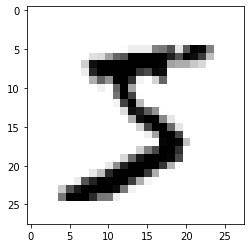

In [ ]:
# 灰階圖片顯示邏輯: 0=黑, 255=白
import matplotlib.pyplot as plt

# 將資料化為圖形
# cmap= color map
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
# reverse: "_r"
plt.imshow(x_train[0], cmap="gray_r")

In [ ]:
import pandas as pd
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


下載tensorflow版本: 3.8 or 3.7:2.0.0

### 模型大小: 依困難度做、輸入大小
#### 互斥版的sigmoid: 目的為讓參數加起來=1(變成機率形式)

softmax=e^x1/e
> 多元分類，機率相加後=0


sigmoid
> 2分，輸出是0-1

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# 稠密(全連接)層: 每個神經都跟其他相連
layers = [
    # 784(28*28) * 256 + 256(bias)=200960
    Dense(256, activation="relu", input_dim=784),
    # 128 * 10 + 10(bias)
    Dense(10, activation="softmax")
]
# input_dim: 輸入總資料筆數(總筆數是透過Shape裡知道資料的長寬後相乘所得)
# 第一層Dense輸入要多少參數(總筆數/10後，取值的上下值，依照loss的表現去做調整)，激活函式也要選擇
# 第二層Dense輸入要跑出幾種資料，判斷資料是多元還是2分法來決定用sigmoid(二元)還是softmax(多元)

model = Sequential(layers)
model.summary() # 印出資料摘要
# param個數: 需要調整的參數有幾個
# 事先扣一個常數，讓所有係數慢慢調整正確

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 訓練模型

# 一個神經元要當作是兩個機率: 選擇BinaryCrossEntropy
# 多個神經元: pi*log(1/qi): CategoricalCrossEntropy
from tensorflow.keras.losses import CategoricalCrossentropy
# compile
model.compile(loss=CategoricalCrossentropy(), # 偵測訓練資料和測試資料之間的損失
       metrics=["accuracy"],
       optimizer="adam")
# metrics: 設定度量衡方便觀看


## 損失函式:
* 距離目標遠的時候，斜率大
* 距離目標近的時候，斜率小

#### MSE沒有這樣的特點，會訓練太久
> 所以不適合用在機率，但能用在迴歸(預測房價)

> 應選擇：entropy(猜錯機率gini的log版)
* 交叉商Cross Entropy=log loss: p1(log 1/q1)+p2(log 1/q2)
* 目標: q1,q2 == p1, p2，所得解是min，正解

---

### 全局最佳 v.s.局部最佳
> 建立動量優化Optimizer: 
* 在梯度下降的過程中，依然保持**動能**
* Wf=現在坡度+比例(摩擦力)*前一時間點的速度

> 動態步長優化
* 隨著時間變化慢慢修改步伐

無腦選adam優化器 = 動量優化+動態步長優化
> 在使用敏感模型(動一髮動全身)時要加入優化器

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, 10)
# 強迫化成10個欄位
y_test_cat = to_categorical(y_test, 10)
print(y_train[0])
print(y_test_cat[0])

5
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
# reshape: 改變成一度空間
# x_train.reshape(60000, 784)
x_train_shape = x_train.reshape(-1, 784) / 255.0 # -1是讓演算法自己偵測有幾筆資料
# x_test.reshape(10000, 784)
x_test_shape = x_test.reshape(-1, 784) / 255.0

### tensorflow
> 隨機range() 搭配 
> scaling輸入(-1~1)or(0~1) <--潛規則

參數解釋：
* batch_size: 觀察多一點梯度，平均出來的結果比較準確
  >* 為了避免ram負擔太大
  >* 依照圖片大小設定: 20(圖大、資料少)-200(圖小、資料多)
* validation_split: 抓出一些資料出來以驗證訓練狀況，以免過擬合
* epochs: 訓練次數，不填入的話就只訓練一次
* verbose: 設定0為不顯示；1為詳細顯示；2為簡易顯示

資料解釋: 
* 270: 54000筆/200次
* accuracy、loss: 越大越好
* val_loss: 是用機率來看，越小準確率越高，用來觀察會比val_accuracy好

---

[keras callback](https://keras.io/zh/callbacks/): 每一次epoch就回呼一次
>參數解釋:
>* monitor: "val_loss"
>* patience: 如果x次都沒變好，就停下來。可以設多次(10)一點
>* restore_best_weight: 取最好結果


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# 將訓練函數裡的callback單獨拉出來設定後再放回去
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True)
]

model.fit(x_train_shape,
     y_train_cat,
     batch_size=200,
     epochs=50,
     validation_split=0.1,
     verbose=2,
     callbacks=callbacks)


Epoch 1/50
270/270 - 2s - loss: 0.3672 - accuracy: 0.8998 - val_loss: 0.1578 - val_accuracy: 0.9588
Epoch 2/50
270/270 - 1s - loss: 0.1614 - accuracy: 0.9535 - val_loss: 0.1143 - val_accuracy: 0.9670
Epoch 3/50
270/270 - 1s - loss: 0.1120 - accuracy: 0.9678 - val_loss: 0.0950 - val_accuracy: 0.9727
Epoch 4/50
270/270 - 1s - loss: 0.0833 - accuracy: 0.9761 - val_loss: 0.0827 - val_accuracy: 0.9753
Epoch 5/50
270/270 - 1s - loss: 0.0648 - accuracy: 0.9815 - val_loss: 0.0759 - val_accuracy: 0.9782
Epoch 6/50
270/270 - 1s - loss: 0.0530 - accuracy: 0.9852 - val_loss: 0.0723 - val_accuracy: 0.9780
Epoch 7/50
270/270 - 1s - loss: 0.0431 - accuracy: 0.9882 - val_loss: 0.0703 - val_accuracy: 0.9785
Epoch 8/50
270/270 - 1s - loss: 0.0355 - accuracy: 0.9906 - val_loss: 0.0696 - val_accuracy: 0.9798
Epoch 9/50
270/270 - 1s - loss: 0.0290 - accuracy: 0.9925 - val_loss: 0.0671 - val_accuracy: 0.9800
Epoch 10/50
270/270 - 1s - loss: 0.0236 - accuracy: 0.9944 - val_loss: 0.0674 - val_accuracy: 0.9803

In [ ]:
model.evaluate(x_test_shape, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0642 - accuracy: 0.9793


[0.06419745087623596, 0.9793000221252441]

In [ ]:
from sklearn.metrics import confusion_matrix
# sklearn: predict_proba/predict
# tensorflow: predict/predict_classes
pre = model.predict_classes(x_test_shape)
mat = confusion_matrix(y_test, pre)
# 出tensorflow後就不帶y_test_cat
pd.DataFrame(mat,
       columns=[str(i) + " 預測" for i in range(10)],
       index=[str(i) + " 正確" for i in range(10)])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,0 預測,1 預測,2 預測,3 預測,4 預測,5 預測,6 預測,7 預測,8 預測,9 預測
0 正確,971,0,1,0,1,0,3,1,3,0
1 正確,0,1125,3,1,0,1,2,0,3,0
2 正確,5,1,1006,5,3,0,2,5,5,0
3 正確,0,0,2,992,0,4,0,5,4,3
4 正確,2,0,0,1,957,0,5,2,2,13
5 正確,3,0,0,7,1,871,3,2,2,3
6 正確,3,2,1,1,4,4,941,0,2,0
7 正確,1,4,13,5,0,0,0,996,2,7
8 正確,6,0,2,7,4,2,2,3,945,3
9 正確,3,2,1,5,5,3,0,1,0,989


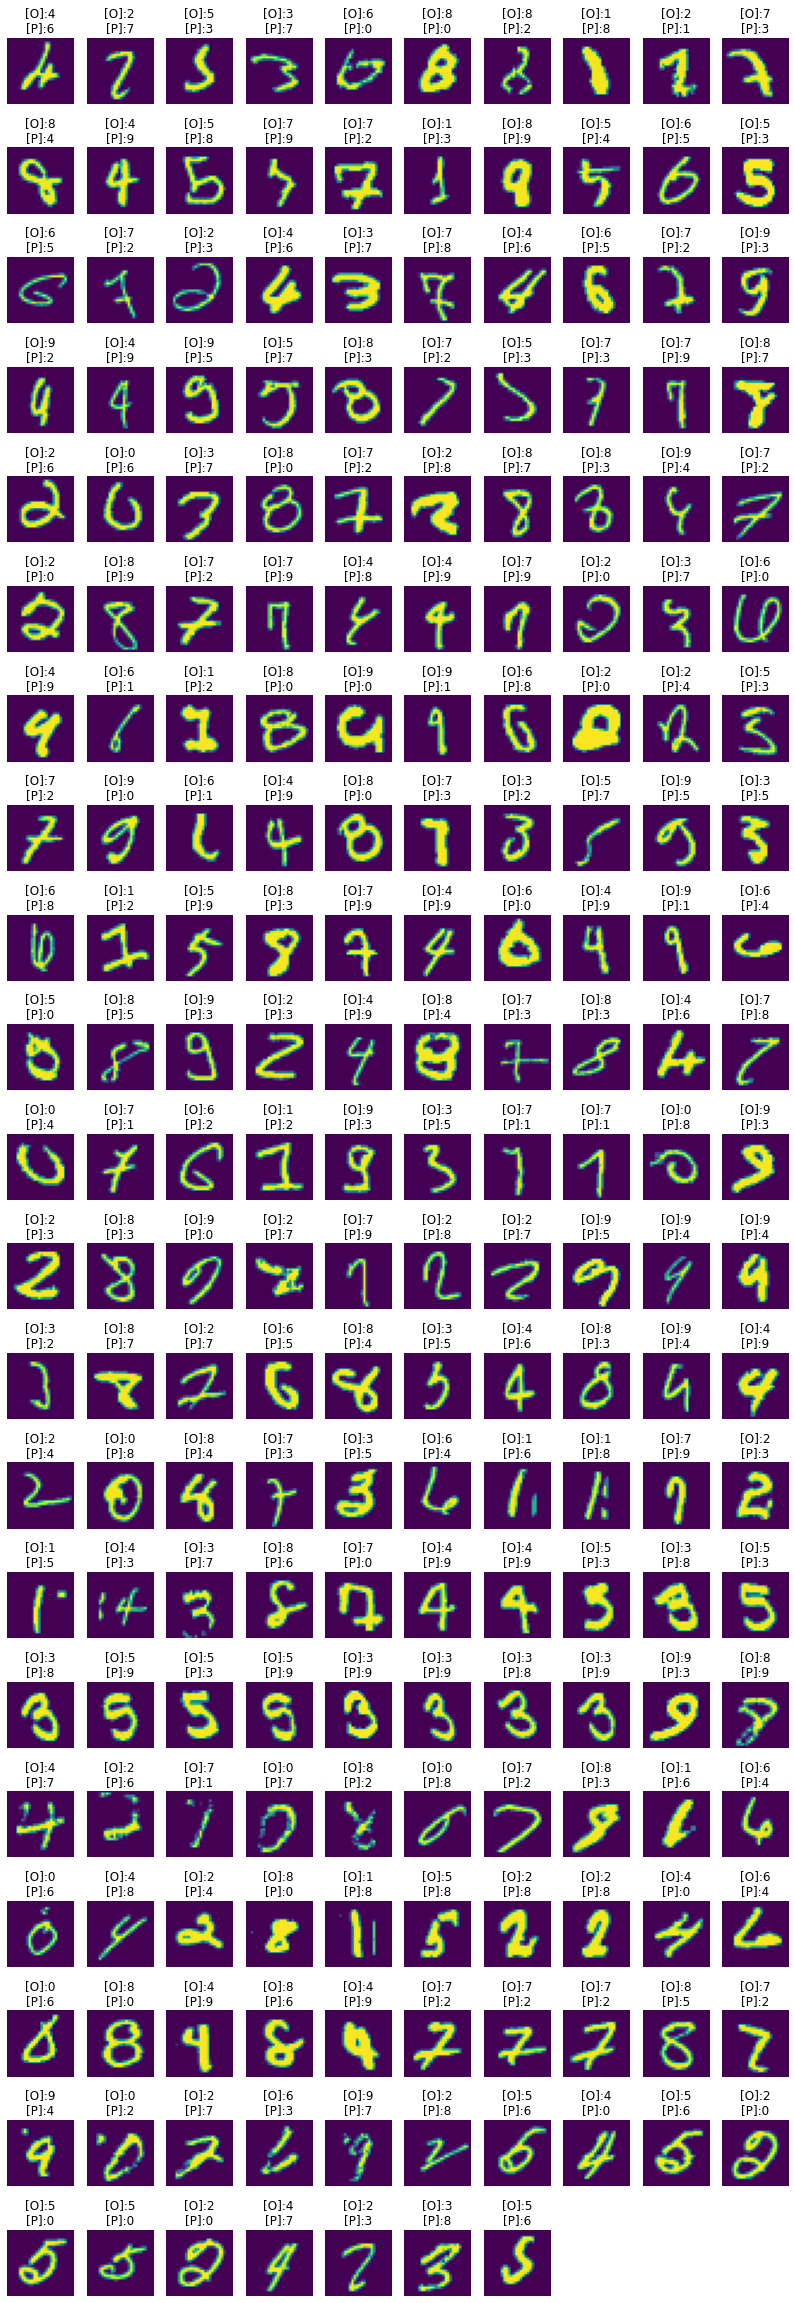

In [ ]:
import numpy as np

idx = np.nonzero(pre != y_test)[0]
false_img = x_test[idx]
false_pre = pre[idx]
false_label = y_test[idx]
plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    plt.imshow(false_img[i])
    t = "[O]:{}\n[P]:{}".format(false_label[i], false_pre[i])
    plt.title(t)
    plt.axis("off")


In [ ]:
# 自製圖片提供給演算法辨認
# Pillow
from PIL import Image
# RGB, RGBA, L(gray)
fn = input("輸入檔名:")
img = Image.open(fn).resize((28, 28)).convert("L")
img_np = np.array(img)
img_np_r = img_np.reshape(1, 784) / 255.0
proba = model.predict(img_np_r)[0]
for i in range(10):
    print(i, "的機率:", proba[i])
ans = model.predict_classes(img_np_r)[0]
print("答案:", ans)
plt.imshow(img_np)